# Notebook Details

*   Author: Esther Vogt
*   Creation Date: 30.05.2021
*   Purpose: Understand Structure of image data


# Imports / Settings / User Input

In [ ]:
# connect colab to drive files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# copy path to .py file to allow function load
!cp '/content/gdrive/MyDrive/Computer Vision Project/notebooks/data_munching_ev.py' .

In [ ]:
# import standard packages
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

# import own packages
import data_munching_ev as dm

# Inspect Images


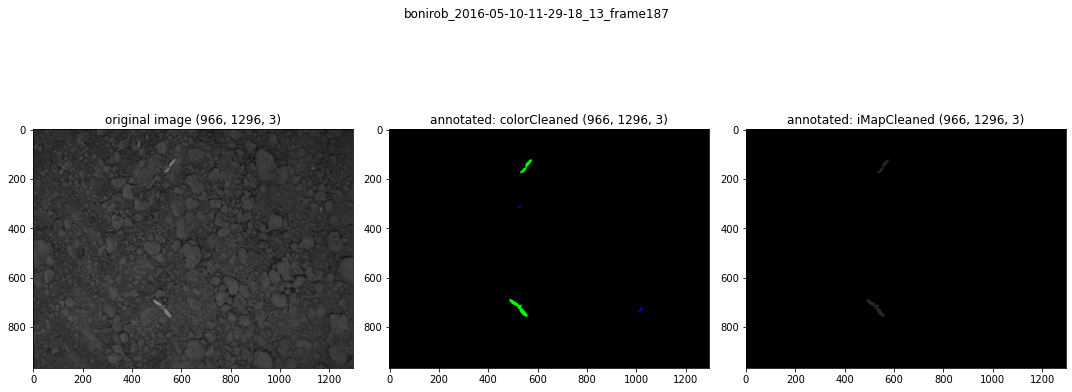

In [ ]:
# specify paths for testing
cka = 160510
cka_path_img_nir = f'/content/gdrive/MyDrive/Computer Vision Project/data/raw/ijrr_sugarbeets_2016_annotations_part04/CKA_{cka}/images/nir/'
cka_path_ann_iMap = f'/content/gdrive/MyDrive/Computer Vision Project/data/raw/ijrr_sugarbeets_2016_annotations_part04/CKA_{cka}/annotations/dlp/iMapCleaned/'
cka_path_ann_color = f'/content/gdrive/MyDrive/Computer Vision Project/data/raw/ijrr_sugarbeets_2016_annotations_part04/CKA_{cka}/annotations/dlp/colorCleaned/'
sample_img_name = 'bonirob_2016-05-10-11-29-18_13_frame187'

# set path to raw image + corresponding annotation
img_nir = cka_path_img_nir + sample_img_name + '.png'
ann_color = cka_path_ann_color + sample_img_name + '.png'
ann_iMap = cka_path_ann_iMap + sample_img_name + '.png'

# load images + annotations
# - colored
img_c = cv2.cvtColor(cv2.imread(img_nir), cv2.COLOR_BGR2RGB)
ann_color_c = cv2.cvtColor(cv2.imread(ann_color), cv2.IMREAD_COLOR)
ann_iMap_c = cv2.cvtColor(cv2.imread(ann_iMap), cv2.IMREAD_COLOR)
# - grayscale
# img_gray = cv2.cvtColor(img_c, cv2.COLOR_BGR2GRAY) # convert to float32 as required for cv2.calcHist()
# print(img_gray.shape)

# Show image
fig, ax = plt.subplots(1,3, figsize=(15,7))
plt.suptitle(f'{sample_img_name}')
ax[0].imshow(img_c)
ax[0].set_title(f'original image {img_c.shape}')
ax[1].imshow(ann_color_c)
ax[1].set_title(f'annotated: colorCleaned {ann_color_c.shape}')
ax[2].imshow(ann_iMap_c)
ax[2].set_title(f'annotated: iMapCleaned {ann_iMap_c.shape}')
plt.tight_layout()

In [ ]:
# get #unique colors per image
print('#distinct colors in ann_color_c: ', Counter([tuple(colors) for i in ann_color_c for colors in i]))
print('#distinct colors in ann_iMap_c: ', Counter([tuple(colors) for i in ann_iMap_c for colors in i]))

# specify label color map
label_color_map_colorCleaned = [
               (0, 0, 0),  # background
               (0, 255, 0), # crop
               (0, 0, 255), # weed
]

label_color_map_iMapCleaned = [
               (0, 0, 0),  # background
               (39, 39, 39), # crop
              #  (0, 0, 255), # weed
]

#distinct colors in ann_color_c:  Counter({(0, 0, 0): 1249604, (0, 255, 0): 2110, (0, 0, 255): 222})
#distinct colors in ann_iMap_c:  Counter({(0, 0, 0): 1249826, (39, 39, 39): 2110})


# Adjust input

In [ ]:
# # adjust individual channels
# # Split into 3 channels
# r, g, b = im.split()

# # Increase Reds
# r = r.point(lambda i: i * 1.2)

# # Decrease Greens
# g = g.point(lambda i: i * 0.9)

# # Recombine back to RGB image
# result = Image.merge('RGB', (r, g, b))